In [127]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import pandas_datareader.data as web
import datetime
import yfinance as yf

In [128]:
start = '2015-01-01'
end = '2025-01-01'
df = yf.download('AAPL', start, end)
print(df.head())


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2015-01-02  24.320427  24.789796  23.879976  24.778673  212818400
2015-01-05  23.635281  24.169160  23.448424  24.089078  257142000
2015-01-06  23.637512  23.897778  23.274918  23.699798  263188400
2015-01-07  23.968962  24.069063  23.735389  23.846614  160423600
2015-01-08  24.889902  24.947740  24.180287  24.298187  237458000


In [129]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700
2024-12-26,258.735504,259.814335,257.347047,257.906429,27237100
2024-12-27,255.309296,258.415896,252.782075,257.546826,42355300
2024-12-30,251.923019,253.221595,250.474615,251.952985,35557500
2024-12-31,250.144974,253.001833,249.156056,252.162760,39480700


In [130]:
df = df.reset_index()
df = df.drop(['Date'], axis=1)
df.head()

/var/folders/l1/c9kl2w496l52vb_1ryz9_gyw0000gn/T/ipykernel_23169/1083659336.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date'], axis=1)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,24.320427,24.789796,23.879976,24.778673,212818400
1,23.635281,24.169160,23.448424,24.089078,257142000
2,23.637512,23.897778,23.274918,23.699798,263188400
3,23.968962,24.069063,23.735389,23.846614,160423600
4,24.889902,24.947740,24.180287,24.298187,237458000


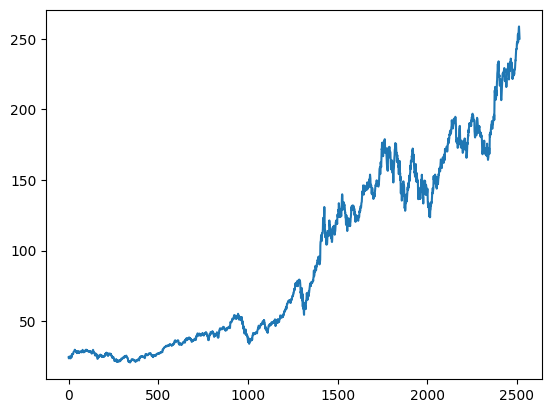

In [131]:
plt.plot(df.Close)

In [132]:
#moving average of 100 days
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2511,229.357535
2512,229.859200
2513,230.346935
2514,230.774993


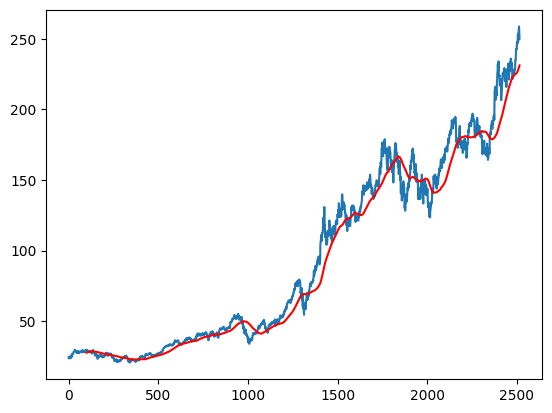

In [133]:
plt.Figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [134]:
#moving average of 200 days
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2511,211.182570
2512,211.614168
2513,212.039086
2514,212.437766


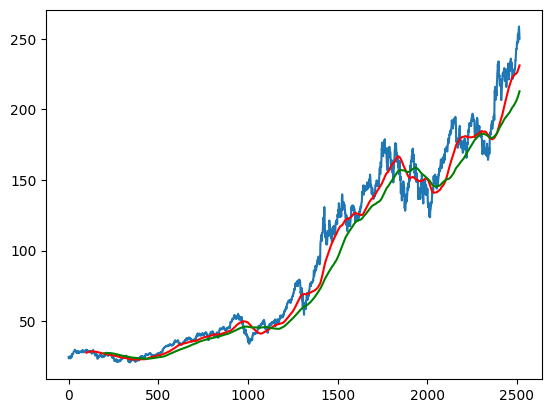

In [135]:
plt.Figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [136]:
df.shape

(2516, 5)

In [137]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(755, 1)


In [138]:
data_training.head()

Ticker,AAPL
0,24.320427
1,23.635281
2,23.637512
3,23.968962
4,24.889902


In [139]:
data_testing.head()

Ticker,AAPL
1761,175.135452
1762,174.516266
1763,178.879898
1764,176.609619
1765,171.911835


In [140]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [141]:
data_training_array = scaler.fit_transform(data_training)
print("Data training:", data_training_array)

Data training: [[0.02328838]
 [0.01891197]
 [0.01892622]
 ...
 [1.        ]
 [0.99347101]
 [0.99403642]]


In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i]) #first 100 days as features to predict the 101th day price
    y_train.append(data_training_array[i,0]) # 101th day 

x_train, y_train = np.array(x_train),np.array(y_train)

In [ ]:
x_train.shape 

(1661, 100, 1)

Machine learning model

In [143]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units=50, activation='relu',return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60, activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80, activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=50, activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120, activation='relu',return_sequences=True))
model.add(Dropout(0.5))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
